In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [288]:
# data[data.High_bid == 67.4]

In [289]:
data = pd.read_csv('selected_col_v2.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data = data.dropna()
# TESTINTG: drop High_bid over 100
data = data[data['High_bid'] < 100]
data.shape


(2039, 171)

In [290]:
data.loc[data['Year_2923'] == 1, 'Year_2023'] = 1
data.loc[data['Year_2923'] == 1, 'Year_2923'] = 0
# data[data['Year_2923'] == 1]
data = data.drop(['Year_2923'], axis=1)
data.shape

(2039, 170)

In [291]:
# year_col = ['Year_2005', 'Year_2007', 'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021', 'Year_2022', 'Year_2023']
# country_col = ['Country_Brazil', 'Country_Burundi', 'Country_Colombia', 'Country_Costa Rica', 'Country_Ecuador', 'Country_El Salvador', 'Country_Ethiopia', 'Country_Guatemala', 'Country_Honduras', 'Country_Indonesia', 'Country_México', 'Country_Nicaragua', 'Country_Perú', 'Country_Rwanda']
variety_col = ['geisha', 'pacamara', 'catuai', 'caturra', 'bourbon', 'typica', 'sl-28', 'sl-34', 'colombia', '74112', '74110', '74158', 'mixed_variety']
buyer_col = ['Asia', 'North_America', 'Nordic', 'Europe', 'Others']
farm_col = []
year_col = []
process_col = []
country_col = []
flavor_col = ['Clean_and_clear', 'Balance_cup', 'Transparent_cup', 'Creamy_body', 'Big_body', 'Long_aftertaste', 'Roasted_flavor', 'Spices_flavor', 'NuttyCocoa_flavor', 'Sweet_flavor', 'Floral_flavor', 'Fruity_flavor', 'GreenVegetative_flavor', 'Winey_flavor', 'Malic_acidity', 'Citric_acidity', 'Tartaric_acidity', 'Lactic_acidity', 'Complex_acidity']
for col in data.columns:
    if 'Farm' in col:
        farm_col.append(col)
    elif 'Year' in col:
        year_col.append(col)
    elif 'Process' in col:
        process_col.append(col)
    elif 'Country' in col:
        country_col.append(col)

In [335]:
basic_feature = ['Rank', 'COE_score', 'Altitude']
obj = ['High_bid']
# year_col.remove('Year_2923')
feature_set_1 = obj + basic_feature + year_col + country_col
feature_set_2 = obj + basic_feature + year_col + country_col + variety_col + process_col + buyer_col + flavor_col
                 
feature_set_3 = obj + basic_feature + year_col + country_col + variety_col + process_col + buyer_col + farm_col + flavor_col
                 
## Below is for some other trying
## Just variety and process(no flavor) without buyer
feature_set_4 = obj + basic_feature + year_col + country_col + variety_col + process_col
                 
## Just variety and process(no flavor) with buyer
feature_set_5 = obj + basic_feature + year_col + country_col + variety_col + process_col + buyer_col

## Just flavor (no variety and process) without buyer
feature_set_6 = obj + basic_feature + year_col + country_col + flavor_col
                 
## Just flavor (no variety and process) with buyer
feature_set_7 = obj + basic_feature + year_col + country_col + flavor_col + buyer_col
                 

In [349]:
# use feature_set_2 to plot a heatmap of correlation, using plotly
import plotly.express as px
import plotly.graph_objects as go
# since there are too many features, we only plot the heatmap of correlation of features with High_bid (a row)

# correlation matrix
corr = data[feature_set_2].corr()
# only plot the heatmap of correlation of features with High_bid
# corr = corr[['High_bid']].T

# choose the high correlation features
corr = corr[(corr > 0)]

fig = px.imshow(corr)
fig.show()

In [355]:
buyer_flavor = buyer_col + flavor_col
corr = data[buyer_flavor].corr()
corr = corr[(corr > 0)]
fig = px.imshow(corr)
# rotate the labels
fig.update_xaxes(tickangle=45)
fig.update_yaxes(tickangle=45)
fig.show()

In [364]:
high_bid_variety = obj + variety_col
corr = data[high_bid_variety].corr()
corr = corr[['High_bid']].T
corr = corr[(corr > 0)]
fig = px.imshow(corr)
# rotate the labels
fig.update_xaxes(tickangle=45)
fig.update_yaxes(tickangle=45)
fig.show()

In [294]:
def split_xy(data, feature_set):
    x = data[feature_set].drop(['High_bid'], axis=1)
    y = data['High_bid']
    return x, y

In [295]:
def PreProcess(data, feature_set):
    # split data into train and test
    train, test = train_test_split(data, test_size=0.2, random_state=24)
    x_train, y_train = split_xy(train, feature_set)
    x_test, y_test = split_xy(test, feature_set)

    # standardize feature values
    

    # xscaler = preprocessing.StandardScaler().fit(x_train[['COE_score', 'Altitude']])
    # # standardize feature values
    # x_train_conti = xscaler.transform(x_train[['COE_score', 'Altitude']])
    # x_train = np.concatenate((x_train_conti, x_train.drop(['COE_score', 'Altitude'], axis=1)), axis=1)
    # x_test_conti = xscaler.transform(x_test[['COE_score', 'Altitude']])
    # x_test = np.concatenate((x_test_conti, x_test.drop(['COE_score', 'Altitude'], axis=1)), axis=1)
    return x_train, y_train, x_test, y_test

# train, test = train_test_split(data, test_size=0.2, random_state=24)
# x_train, y_train = split_xy(train, feature_set_2)
# x_test, y_test = split_xy(test, feature_set_2)

# xscaler = preprocessing.StandardScaler().fit(x_train[['COE_score', 'Altitude']])
# # standardize feature values
# x_train_conti = xscaler.transform(x_train[['COE_score', 'Altitude']])
# x_train = np.concatenate((x_train_conti, x_train.drop(['COE_score', 'Altitude'], axis=1)), axis=1)
# x_test_conti = xscaler.transform(x_test[['COE_score', 'Altitude']])
# x_test = np.concatenate((x_test_conti, x_test.drop(['COE_score', 'Altitude'], axis=1)), axis=1)

In [321]:
len(feature_set_3)

170

In [296]:

# calculate the metrics of regression
def regression_metrics(y_test, y_pred):
    mse = np.mean((y_test - y_pred)**2)
    mae = np.mean(np.abs(y_test - y_pred))
    rmse = np.sqrt(mse)
    return mse, mae, rmse


In [356]:
def LR(x_train, y_train, x_test, y_test):
    lr_model = LinearRegression()
    lr_model.fit(x_train, y_train)
    y_pred = lr_model.predict(x_test)
    # return MAE, RMSE
    mse = np.mean((y_test - y_pred)**2)
    mae = np.mean(np.abs(y_test - y_pred))
    rmse = np.sqrt(mse)
    return y_pred, lr_model.score(x_test, y_test), mse, mae, rmse

def LASSO(x_train, y_train, x_test, y_test):
    lasso = linear_model.Lasso(alpha=0.1)
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_test)
    mse = np.mean((y_test - y_pred)**2)
    mae = np.mean(np.abs(y_test - y_pred))
    rmse = np.sqrt(mse)
    # print the parameters of the model
    # print('LASSO param: ',lasso.coef_)
    return y_pred, lasso.score(x_test, y_test), mse, mae, rmse

def Ridge(x_train, y_train, x_test, y_test):
    ridge = linear_model.Ridge(alpha=0.1)
    ridge.fit(x_train, y_train)
    y_pred = ridge.predict(x_test)
    mse = np.mean((y_test - y_pred)**2)
    mae = np.mean(np.abs(y_test - y_pred))
    rmse = np.sqrt(mse)
    # print the parameters of the model
    # print('Ridge param: ',ridge.coef_)
    return y_pred, ridge.score(x_test, y_test), mse, mae, rmse

def RandomForest(x_train, y_train, x_test, y_test):
    rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    mse = np.mean((y_test - y_pred)**2)
    mae = np.mean(np.abs(y_test - y_pred))
    rmse = np.sqrt(mse)
    # print('RandomForest param: ',rf.feature_importances_)
    
    return y_pred, rf.score(x_test, y_test), mse, mae, rmse

def GradientBoosting(x_train, y_train, x_test, y_test):
    gb = GradientBoostingRegressor(n_estimators=100, max_depth=10, random_state=0)
    gb.fit(x_train, y_train)
    y_pred = gb.predict(x_test)
    mse = np.mean((y_test - y_pred)**2)
    mae = np.mean(np.abs(y_test - y_pred))
    rmse = np.sqrt(mse)
    # print('gradient:',gb.get_params())
    return y_pred, gb.score(x_test, y_test), mse, mae, rmse

def XGBoost(x_train, y_train, x_test, y_test):
    xgb = XGBRegressor(n_estimators=100, max_depth=10, random_state=0)
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)
    mse = np.mean((y_test - y_pred)**2)
    mae = np.mean(np.abs(y_test - y_pred))
    rmse = np.sqrt(mse)
    # print('XGBoost param: ',xgb.get_xgb_params())
    return y_pred, xgb.score(x_test, y_test), mse, mae, rmse

def plot_pred_by_index(y_test, y_pred):
    # plot the predicted values and the true values, using plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_test, mode='lines', name='True'))
    fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_pred, mode='lines', name='Predicted'))
    fig.update_layout(title='True and Predicted High_bid', xaxis_title='Index', yaxis_title='High_bid')
    fig.show()

def plot_pred(y_test, y_pred, model, feature_set):
    # plot the scatter plot of predicted values and the true values, using plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers'))
    fig.update_layout(title=f'True and Predicted High_bid of {model} using feature set {feature_set}', xaxis_title='True', yaxis_title='Predicted')
    if (feature_set == 'rf25'):
        fig.update_layout(title=f'True and Predicted High_bid of {model} using 25 features selected', xaxis_title='True', yaxis_title='Predicted')
    elif feature_set == 'rf50':
        fig.update_layout(title=f'True and Predicted High_bid of {model} using 50 features selected', xaxis_title='True', yaxis_title='Predicted')
    elif feature_set == 'rf75':
        fig.update_layout(title=f'True and Predicted High_bid of {model} using 75 features selected', xaxis_title='True', yaxis_title='Predicted')
    elif feature_set == 'rf100':
        fig.update_layout(title=f'True and Predicted High_bid of {model} using 100 features selected', xaxis_title='True', yaxis_title='Predicted')
    elif feature_set == 'joined39':
        fig.update_layout(title=f'True and Predicted High_bid of model joined using 39 features selected', xaxis_title='True', yaxis_title='Predicted')
    # add a diagonal line
    fig.add_trace(go.Scatter(x=[0, 100], y=[0, 100], mode='lines', name='Diagonal'))
    fig.show()
    # clear the figure
    fig.data = []

def plot_pred_1(y_test, y_pred, model, feature_set): # use seaborn
    # plot the scatter plot of predicted values and the true values, using seaborn
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(y_test, y_pred, c='b', marker='o')
    ax.plot([0, 100], [0, 100], 'r-', lw=2)
    ax.set_xlabel('True')
    ax.set_ylabel('Predicted')
    ax.set_title(f'True and Predicted High_bid of {model} using feature set {feature_set}')
    plt.show()
    

In [366]:
compare = [90.7,92.2,75,75.1]
data[data['High_bid'].isin(compare)]

,Rank,COE_score,High_bid,Clean_and_clear,Balance_cup,Transparent_cup,Creamy_body,Big_body,Long_aftertaste,Roasted_flavor,Spices_flavor,NuttyCocoa_flavor,Sweet_flavor,Floral_flavor,Fruity_flavor,GreenVegetative_flavor,Winey_flavor,Malic_acidity,Citric_acidity,Tartaric_acidity,Lactic_acidity,Complex_acidity,geisha,pacamara,catuai,caturra,bourbon,typica,sl-28,sl-34,colombia,74112,74110,74158,mixed_variety,Altitude,Asia,North_America,Nordic,Europe,Others,Farm_agua dulce,Farm_bella aurora,Farm_bella elizabeth,Farm_bella vista,Farm_betania,Farm_buena vista,Farm_buenos aires,Farm_chiriloma,Farm_divina providencia,Farm_don cayito,Farm_el aguacate,Farm_el bosque,Farm_el cairo,Farm_el cambalache,Farm_el cedro,Farm_el centro,Farm_el cerro,Farm_el conacaste,Farm_el diamante,Farm_el equimite,Farm_el espejo,Farm_el guayabo,Farm_el injerto i,Farm_el matazano,Farm_el mirador,Farm_el morito i,Farm_el nacimiento no.,Farm_el naranjo,Farm_el paraiso,Farm_el paraxaj,Farm_el pino,Farm_el plan,Farm_el porvenir,Farm_el recuerdo,Farm_el roble,Farm_el socorro,Farm_el tambor,Farm_el vergel,Farm_el zapote y anexos,Farm_esperanza,Farm_finca santa cruz,Farm_gakenke,Farm_guatalon,Farm_kalibus la sierra,Farm_la bella,Farm_la bendicion,Farm_la colmena,Farm_la esmeralda,Farm_la españa,Farm_la esperanza,Farm_la fortuna,Farm_la hermosa,Farm_la laguna,Farm_la loma,Farm_la lucuma,Farm_la mina,Farm_la montañita,Farm_la orquidea,Farm_la palma,Farm_la picona,Farm_la planada,Farm_la pradera,Farm_la reforma y anexos,Farm_la salsa,Farm_las brisas,Farm_las brumas,Farm_las delicias,Farm_las duanas,Farm_las flores,Farm_las macadamias,Farm_las nubes,Farm_las palmas,Farm_las ventanas,Farm_las virginias,Farm_liquidambar,Farm_los aguacates,Farm_los morales,Farm_los pinos,Farm_los pirineos,Farm_los robles,Farm_mileydi,Farm_mpanga,Farm_nueva alianza,Farm_nuevo progreso,Farm_ojo de agua,Farm_peña redonda,Farm_plan de la vega,Farm_platanares,Farm_rosma,Farm_san isidro,Farm_san jose,Farm_san luis,Farm_san rafael,Farm_santa elena,Farm_santa lucia,Farm_santa rosa,Farm_santa teresa,Farm_un regalo de dios,Farm_villaure,Farm_yandaro,Country_Brazil,Country_Burundi,Country_Colombia,Country_Costa Rica,Country_Ecuador,Country_El Salvador,Country_Ethiopia,Country_Guatemala,Country_Honduras,Country_México,Country_Nicaragua,Country_Perú,Country_Rwanda,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023,Process_anaerobic,Process_honey,Process_natural,Process_washed,Process_wet hulled
326,1,90.65,92.2,1,0,0,0,0,0,0,0,1,3,4,17,0,0,2,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2015.000000,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
540,2,90.40,75.1,0,0,0,0,0,0,0,1,2,8,1,17,0,0,1,2,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1660.000000,1.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
653,3,90.07,75.1,0,0,0,1,0,0,1,0,5,8,3,15,2,0,1,6,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1897.000000,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1608,1,90.39,75.0,0,1,0,0,0,1,0,0,1,0,2,4,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,96.570053,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

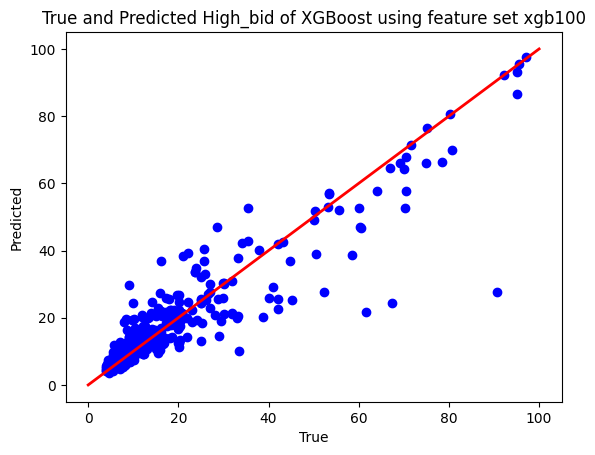

In [314]:
plot_result = True
f = 'xgb100'
feature_set = eval('feature_set_' + f)
x_train, y_train, x_test, y_test = PreProcess(data, feature_set)
m = 'XGBoost'
y_pred, score, mse, mae, rmse = eval(m)(x_train, y_train, x_test, y_test)
# score_df.loc[f, m] = rmse
if plot_result:
    plot_pred_1(y_test, y_pred, m, f)

In [322]:
plot_result = True
f = '3'
feature_set = eval('feature_set_' + f)
x_train, y_train, x_test, y_test = PreProcess(data, feature_set)
m = 'XGBoost'
y_pred, score, mse, mae, rmse = eval(m)(x_train, y_train, x_test, y_test)
# score_df.loc[f, m] = rmse
if plot_result:
    plot_pred(y_test, y_pred, m, f)

In [361]:
plot_result = 1
models = ['LR', 'LASSO', 'Ridge', 'GradientBoosting', 'RandomForest', 'XGBoost']
# feature_sets = ['1', '2', '3', '8', '9', '10', '11', '12']
feature_sets = ['1', '2', '3', 'rf25', 'rf50', 'rf75', 'rf100', 'joined39']


score_df = pd.DataFrame(columns=['LR', 'LASSO', 'Ridge', 'GradientBoosting', 'RandomForest', 'XGBoost'])
for f in feature_sets:
    feature_set = eval('feature_set_' + f)
    x_train, y_train, x_test, y_test = PreProcess(data, feature_set)
    for m in models:
        y_pred, score, mse, mae, rmse = eval(m)(x_train, y_train, x_test, y_test)
        score_df.loc[f, m] = rmse
        if plot_result:
            plot_pred(y_test, y_pred, m, f)
score_df



,LR,LASSO,Ridge,GradientBoosting,RandomForest,XGBoost
1,12.618951,12.952936,12.62004,8.630823,8.459548,8.213248
2,12.086606,12.542124,12.091279,8.812126,8.275345,8.406567
3,11.826794,12.542124,11.829621,8.940798,8.178267,8.130397
rf25,12.593223,12.841483,12.594094,9.254661,8.360614,8.465356
rf50,12.141592,12.698557,12.143715,9.064001,8.204745,7.794642
rf75,12.140241,12.542128,12.141738,9.011689,8.233215,7.85522
rf100,12.068893,12.542128,12.069087,8.905401,8.226923,7.984572
joined39,12.127965,12.542128,12.129387,8.800319,8.243157,8.003433


In [362]:
feature_set_rf50

['Rank',
 'Fruity_flavor',
 'COE_score',
 'geisha',
 'Altitude',
 'Citric_acidity',
 'Sweet_flavor',
 'Floral_flavor',
 'NuttyCocoa_flavor',
 'Year_2021',
 'Country_Nicaragua',
 'Tartaric_acidity',
 'Farm_santa rosa',
 'Year_2020',
 'GreenVegetative_flavor',
 'Complex_acidity',
 'Process_honey',
 'Winey_flavor',
 'Spices_flavor',
 'Malic_acidity',
 'Country_Guatemala',
 'Process_anaerobic',
 'Country_Costa Rica',
 'Farm_el cerro',
 'typica',
 'Lactic_acidity',
 'North_America',
 'Farm_el paraiso',
 'Long_aftertaste',
 'Process_natural',
 'Country_Ecuador',
 'Year_2016',
 'pacamara',
 'Asia',
 'Farm_san luis',
 'Creamy_body',
 'Country_Ethiopia',
 'caturra',
 'Process_washed',
 'Year_2022',
 'Clean_and_clear',
 'Country_Brazil',
 'Roasted_flavor',
 'Farm_platanares',
 'Europe',
 'Country_Burundi',
 'Country_México',
 'Country_Honduras',
 'Year_2017',
 'Country_El Salvador',
 'High_bid']

In [302]:
# plot rmse of different models using different feature sets, using plotly. line plot
fig = go.Figure()
for m in models:
    fig.add_trace(go.Scatter(x=feature_sets, y=score_df[m], mode='lines', name=m))
fig.update_layout(title='RMSE of different models using different feature sets', xaxis_title='Feature set', yaxis_title='RMSE')
fig.show()

In [337]:
# plot the feature importance of xgboost
feature_set = feature_set_3
x_train, y_train, x_test, y_test = PreProcess(data, feature_set)

xgb = XGBRegressor(n_estimators=100, max_depth=10, random_state=0)
xgb.fit(x_train, y_train)
features = data[feature_set].drop(['High_bid'], axis=1).columns
print(len(features), len(xgb.feature_importances_))
feature_importance_xgb = pd.DataFrame({'feature': features, 'importance': xgb.feature_importances_})
feature_importance_xgb = feature_importance_xgb.sort_values(by='importance', ascending=False)
fig = px.bar(feature_importance_xgb, x='feature', y='importance')
fig.show()

169 169


In [338]:
# plot the feature importance of RandomForest
feature_set = feature_set_3
x_train, y_train, x_test, y_test = PreProcess(data, feature_set)
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
rf.fit(x_train, y_train)
# feature set = feature_set_3 removing High_bid
features = data[feature_set].drop(['High_bid'], axis=1).columns
print(len(features), len(rf.feature_importances_))
feature_importance_rf = pd.DataFrame({'feature': features, 'importance': rf.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values(by='importance', ascending=False)
fig = px.bar(feature_importance_rf, x='feature', y='importance')
fig.show()



169 169


In [339]:
# 取交集 feature_importance_rf 前75和 feature_importance_xgb前75
feature_importance_rf = feature_importance_rf[:100]
feature_importance_xgb = feature_importance_xgb[:100]
feature_set = feature_importance_rf.merge(feature_importance_xgb, on='feature')
feature_set = feature_set['feature'].tolist()
feature_set = feature_set + ['High_bid']
print(len(feature_set))
feature_set_joined39 = feature_set.copy()

83


In [340]:
feature_set_joined39

['Rank',
 'Fruity_flavor',
 'COE_score',
 'geisha',
 'Altitude',
 'Citric_acidity',
 'Sweet_flavor',
 'Floral_flavor',
 'NuttyCocoa_flavor',
 'Year_2021',
 'Country_Nicaragua',
 'Tartaric_acidity',
 'Farm_santa rosa',
 'Year_2020',
 'GreenVegetative_flavor',
 'Complex_acidity',
 'Process_honey',
 'Winey_flavor',
 'Spices_flavor',
 'Malic_acidity',
 'Country_Guatemala',
 'Process_anaerobic',
 'Country_Costa Rica',
 'Farm_el cerro',
 'typica',
 'Lactic_acidity',
 'North_America',
 'Farm_el paraiso',
 'Long_aftertaste',
 'Process_natural',
 'Country_Ecuador',
 'Year_2016',
 'pacamara',
 'Asia',
 'Farm_san luis',
 'Creamy_body',
 'Country_Ethiopia',
 'caturra',
 'Process_washed',
 'Year_2022',
 'Clean_and_clear',
 'Country_Brazil',
 'Roasted_flavor',
 'Farm_platanares',
 'Europe',
 'Country_Burundi',
 'Country_México',
 'Country_Honduras',
 'Year_2017',
 'Country_El Salvador',
 'Country_Perú',
 'Country_Colombia',
 'Farm_mpanga',
 'Year_2018',
 'Year_2023',
 'Farm_el cedro',
 'Others',
 'b

In [307]:
for m in models:
    feature_set = feature_set_joined39.copy()
    x_train, y_train, x_test, y_test = PreProcess(data, feature_set)
    y_pred, score, mse, mae, rmse = eval(m)(x_train, y_train, x_test, y_test)
    score_df.loc['12', m] = rmse
    # plot_pred(y_test, y_pred, m, '13')
score_df

,LR,LASSO,Ridge,GradientBoosting,RandomForest,XGBoost
1,12.618951,12.952936,12.62004,8.630823,8.459548,8.213248
2,12.122691,12.557681,12.127476,7.52652,8.275029,7.441161
3,11.948992,12.557681,11.948132,7.525987,8.288957,7.425446
xgb25,12.49185,12.746062,12.490992,8.065623,8.448847,8.161488
xgb50,12.313432,12.550424,12.3121,7.368484,8.139749,7.149017
xgb75,12.244872,12.556963,12.247332,7.301613,8.30183,7.436984
xgb100,11.922096,12.557661,11.930063,7.28754,8.317907,6.992069
joined39,11.992201,12.557662,11.998475,7.33299,8.280076,7.314436
12,11.992201,12.557662,11.998475,7.33299,8.280076,7.314436


In [360]:
# the first 25, 50, 75, 100 important features
features_25 = feature_importance_rf.iloc[:25, :]
features_25 = features_25['feature'].values
features_xgb25 = list(features_25)

features_50 = feature_importance_rf.iloc[:50, :]
features_50 = features_50['feature'].values
features_xgb50 = list(features_50)

features_75 = feature_importance_rf.iloc[:75, :]
features_75 = features_75['feature'].values
features_xgb75 = list(features_75)

features_100 = feature_importance_rf.iloc[:100, :]
features_100 = features_100['feature'].values
features_xgb100 = list(features_100)


print(features_xgb25, features_xgb50, features_xgb75, features_xgb100)

features_xgb25.append('High_bid')
features_xgb50.append('High_bid')
features_xgb75.append('High_bid')
features_xgb100.append('High_bid')

feature_set_rf25 = features_xgb25
feature_set_rf50 = features_xgb50
feature_set_rf75 = features_xgb75
feature_set_rf100 = features_xgb100


['Rank', 'Fruity_flavor', 'COE_score', 'geisha', 'Altitude', 'Citric_acidity', 'Sweet_flavor', 'Floral_flavor', 'NuttyCocoa_flavor', 'Year_2021', 'Country_Nicaragua', 'Tartaric_acidity', 'Farm_santa rosa', 'Year_2020', 'GreenVegetative_flavor', 'Complex_acidity', 'Process_honey', 'Winey_flavor', 'Spices_flavor', 'Malic_acidity', 'Country_Guatemala', 'Process_anaerobic', 'Country_Costa Rica', 'Farm_el cerro', 'typica'] ['Rank', 'Fruity_flavor', 'COE_score', 'geisha', 'Altitude', 'Citric_acidity', 'Sweet_flavor', 'Floral_flavor', 'NuttyCocoa_flavor', 'Year_2021', 'Country_Nicaragua', 'Tartaric_acidity', 'Farm_santa rosa', 'Year_2020', 'GreenVegetative_flavor', 'Complex_acidity', 'Process_honey', 'Winey_flavor', 'Spices_flavor', 'Malic_acidity', 'Country_Guatemala', 'Process_anaerobic', 'Country_Costa Rica', 'Farm_el cerro', 'typica', 'Lactic_acidity', 'North_America', 'Farm_el paraiso', 'Long_aftertaste', 'Process_natural', 'Country_Ecuador', 'Year_2016', 'pacamara', 'Asia', 'Farm_san lu

In [309]:
# run the models again using feature_set_8, feature_set_9, feature_set_10, feature_set_11
plot_result = 0
models = ['LR', 'LASSO', 'Ridge', 'GradientBoosting', 'RandomForest', 'XGBoost']
feature_sets = ['8', '9', '10', '11']

score_df = pd.DataFrame(columns=['LR', 'LASSO', 'Ridge', 'GradientBoosting', 'RandomForest', 'XGBoost'])
for f in feature_sets:
    feature_set = eval('feature_set_' + f)
    x_train, y_train, x_test, y_test = PreProcess(data, feature_set)
    for m in models:
        y_pred, score, mse, mae, rmse = eval(m)(x_train, y_train, x_test, y_test)
        score_df.loc[f, m] = rmse
        if plot_result:
            plot_pred(y_test, y_pred, m, f)


In [357]:
# visualize score_df as a table, value rounded to 4 decimal places, including the feature set as index
output = score_df.round(4).copy()
output.index = ['1', '2', '3', 'rf25', 'rf50', 'rf75', 'rf100', 'joined39']
output['feature_set'] = ['1', '2', '3', 'rf25', 'rf50', 'rf75', 'rf100', 'joined39']
output = output.iloc[:7,:]
fig = go.Figure(data=[go.Table(
    header=dict(values=['feature set','LR', 'LASSO', 'Ridge', 'GradientBoosting', 'RandomForest', 'XGBoost'],
                fill_color='lightgrey',
                align='left'),
    ids = list(output.index),
    cells=dict(values=[output.feature_set,output.LR.astype(float).round(4), output.LASSO.astype(float).round(4), output.Ridge.astype(float).round(4), output.GradientBoosting.astype(float).round(4), output.RandomForest.astype(float).round(4), output.XGBoost.astype(float).round(4)],
               fill_color='white',
               align='left'))
])


fig.show()

In [358]:
output = score_df.copy()
output.index = ['1', '2', '3', 'rf25', 'rf50', 'rf75', 'rf100', 'joined39']
output['feature_set'] = ['1', '2', '3', 'rf25', 'rf50', 'rf75', 'rf100', 'joined39']
output = output.iloc[3:7,:]
fig = go.Figure(data=[go.Table(
    header=dict(values=['feature set','LR', 'LASSO', 'Ridge', 'GradientBoosting', 'RandomForest', 'XGBoost'],
                fill_color='lightgrey',
                align='left'),
    ids = list(output.index),
    cells=dict(values=[output.feature_set,output.LR.astype(float).round(4), output.LASSO.astype(float).round(4), output.Ridge.astype(float).round(4), output.GradientBoosting.astype(float).round(4), output.RandomForest.astype(float).round(4), output.XGBoost.astype(float).round(4)],
               fill_color='white',
               align='left'))
])


fig.show()

In [ ]:
output = score_df.copy()
# output.index = ['1', '2', '3', 'xgb25', 'xgb50', 'xgb75', 'xgb100', 'joined39']
output.index = ['1', '2', '3', 'xgb25', 'xgb50', 'xgb75', 'xgb100', 'joined39']
output['feature_set'] = ['1', '2', '3', 'xgb25', 'xgb50', 'xgb75', 'xgb100', 'joined39']
output = output.iloc[6:7,:]
fig = go.Figure(data=[go.Table(
    header=dict(values=['feature set','LR', 'LASSO', 'Ridge', 'GradientBoosting', 'RandomForest', 'XGBoost'],
                fill_color='lightgrey',
                align='left'),
    ids = list(output.index),
    cells=dict(values=[output.feature_set,output.LR.astype(float).round(4), output.LASSO.astype(float).round(4), output.Ridge.astype(float).round(4), output.GradientBoosting.astype(float).round(4), output.RandomForest.astype(float).round(4), output.XGBoost.astype(float).round(4)],
               fill_color='white',
               align='left'))
])


fig.show()

In [ ]:
# visualize score_df
fig = go.Figure()
for m in models:
    fig.add_trace(go.Scatter(x=feature_sets, y=score_df[m], mode='lines', name=m))
fig.update_layout(title='RMSE of different models using different feature sets', xaxis_title='Feature set', yaxis_title='RMSE')
fig.show()

In [ ]:
# 50 largest LR coefficients 

In [ ]:
# plot the scatter plot of predicted values and the true values, using plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers'))
fig.update_layout(title=f'True and Predicted High_bid of RandomForest using feature set {feature_set}', xaxis_title='True', yaxis_title='Predicted')
# add a diagonal line
fig.add_trace(go.Scatter(x=[0, 100], y=[0, 100], mode='lines', name='Diagonal'))
fig.show()

In [ ]:
# construct a data frame data_residual by adding the residual of each data point to the data



Ecuador 2022 (2), Ecuador 2022 (4) have bo description of flavor
El Salvador 2019 (3) is from a well known farm
Brazil 2022 (5) have no description of flavor
Colombia 2021 (12) is from a well known farm
Ethiopia 2022 (9) is from a well known farmer


In [336]:
# 20 most important coefficients in LR
feature_set = feature_set_3
x_train, y_train, x_test, y_test = PreProcess(data, feature_set)
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
# feature set = feature_set_3 removing High_bid
features = data[feature_set].drop(['High_bid'], axis=1).columns
print(len(features), len(lr_model.coef_))
feature_importance = pd.DataFrame({'feature': features, 'coefficient': lr_model.coef_})
feature_importance = feature_importance.sort_values(by='coefficient', ascending=False)
fig = px.bar(feature_importance, x='feature', y='coefficient')
fig.show()


169 169


In [ ]:
print(len(y_test), len(y_pred), len(data_residual))

408 408 2039
